In [1]:
#Load necessary libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
#Load Drugdataset as drugdata
drugdata = pd.read_csv('./drugdataset.csv')

#display the first 15 rows 
drugdata.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,drugY
1,47,0,1,1,13.093,drugC
2,47,0,1,1,10.114,drugC
3,28,1,0,1,7.798,drugX
4,61,1,1,1,18.043,drugY
5,22,1,0,1,8.607,drugX
6,49,1,0,1,16.275,drugY
7,41,0,1,1,11.037,drugC
8,60,0,0,1,15.171,drugY
9,43,0,1,0,19.368,drugY


In [5]:
#Create x and y variables
x=drugdata.drop('Drug', axis=1).to_numpy()
y=drugdata['Drug'].to_numpy()

#Create Training and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

# Import graph libraries for ploting a confusion matrix graph to have a better visual representation of the prediction models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
                xticklabels=target_names, yticklabels=target_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Estimator: SVM
[[ 5  0  0  0  0]
 [ 0  2  0  0  1]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  1 17]]
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         3
       drugX       0.92      1.00      0.96        11
       drugY       0.94      0.94      0.94        18

    accuracy                           0.95        40
   macro avg       0.97      0.92      0.94        40
weighted avg       0.95      0.95      0.95        40



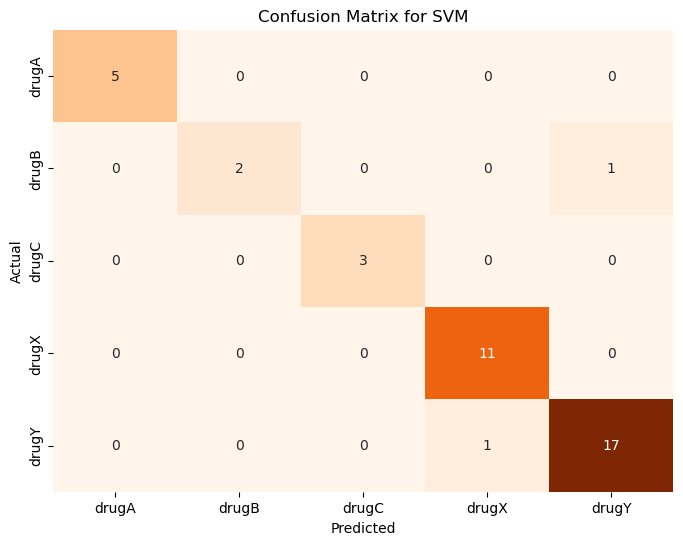


Estimator: Naive Bayes
[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 10  1]
 [ 1  1  3  1 12]]
              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       0.75      1.00      0.86         3
       drugC       0.50      1.00      0.67         3
       drugX       0.91      0.91      0.91        11
       drugY       0.92      0.67      0.77        18

    accuracy                           0.82        40
   macro avg       0.78      0.92      0.82        40
weighted avg       0.86      0.82      0.83        40



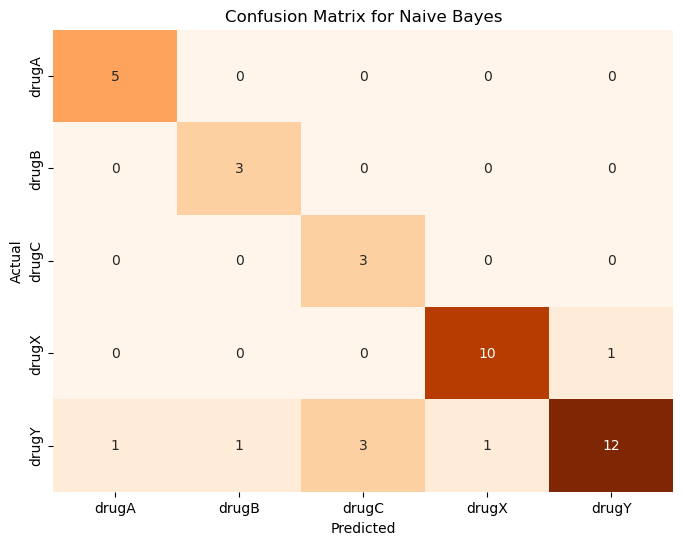

In [15]:
# Script for SVM and Naive Bayes Model
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  

target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

for name, method in [('SVM', SVC(kernel='linear', random_state=100)),
                     ('Naive Bayes', GaussianNB())]: 
    method.fit(x_train2, y_train)
    predict = method.predict(x_test2)
    
    #confusion matrix for models 
    cm = confusion_matrix(y_test, predict)
    
    # Print results
    print('\nEstimator: {}'.format(name)) 
    print(cm)  
    print(classification_report(y_test, predict, target_names=target_names))  
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, f'Confusion Matrix for {name}')